# Ridge, Lasso, ElasticNet Regression

Linear Regression is a machine learning algorithm which is used to establish the linear relationship between dependent and one or more independent variables. This technique is applicable for supervised learning regression problems where we try to predict a continuous variable.
Linear Regression can be further classified into two types – Simple and Multiple Linear Regression.

In this project, I employ Multiple Linear Regression technique where I have one dependent variable and more than one independent variables.

## Table of contents

1. Import Libraries
2. Load Data
3. Data Analysis
4. Data Preprocessing
5. Train Model
6. Test Model on `x_test`
7. Calculate R2 Score
8. Calculate Root Mean Square Error
9. Test Model on custom data
10. Get Model Parameters

## 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

## 2) Load Data

In [2]:
df = pd.read_csv('bikes.csv')
df

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.000000
1,2011-01-04,2.896673,54.267219,15.136882,108.000000
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
...,...,...,...,...,...
724,2012-12-27,5.587201,57.755931,28.678187,247.000000
725,2012-12-28,5.545775,54.242931,14.792709,644.000000
726,2012-12-29,4.924888,54.010283,14.777848,575.666667
727,2012-12-30,4.304001,53.777635,14.762987,507.333333


## 3) Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         729 non-null    object 
 1   temperature  729 non-null    float64
 2   humidity     729 non-null    float64
 3   windspeed    729 non-null    float64
 4   count        729 non-null    float64
dtypes: float64(4), object(1)
memory usage: 28.6+ KB


In [4]:
df.describe()

,temperature,humidity,windspeed,count
count,729.000000,729.000000,729.000000,729.000000
mean,17.762024,56.514591,17.241418,622.818930
std,8.921313,7.348730,5.222353,383.958772
min,-2.200000,21.300000,5.300000,2.000000
25%,10.066578,51.561669,13.462096,256.333333
50%,18.087694,56.546144,16.656522,639.000000
75%,25.455587,61.423987,20.320807,891.666667
max,35.100000,75.600000,35.200000,1820.000000


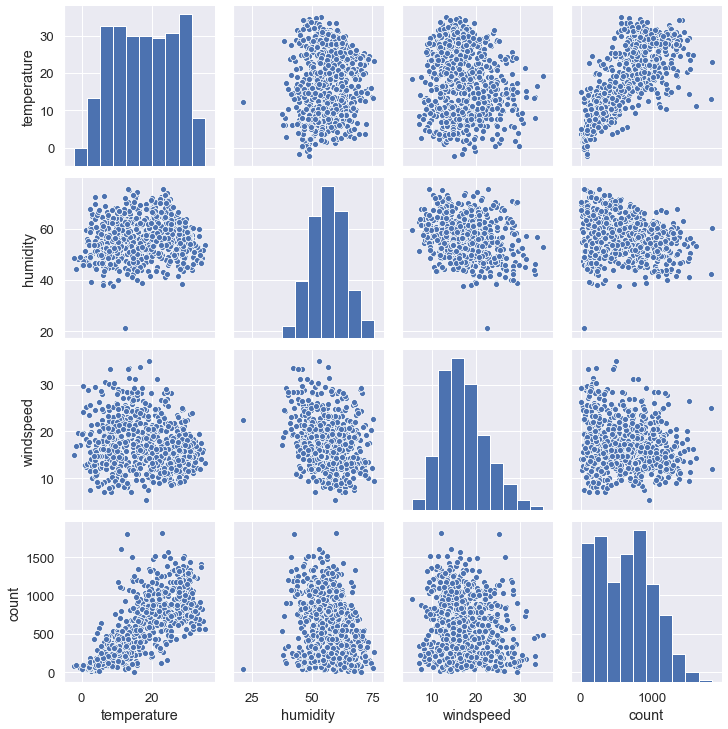

In [5]:
sns.pairplot(df)

## 4) Data Preprocessing

In [5]:
x = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 5) Train Model

In [7]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## 6) Test Model on `x_test`

In [8]:
y_pred = model.predict(x_test)
y_pred

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

In [9]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
266    554.003093
23     519.340989
222    502.409785
261    514.009818
426    530.766719
Name: Yearly Amount Spent, Length: 150, dtype: float64

## 7) Calculate R2 Score

In [10]:
model.score(x_train, y_train)

0.9854085989105928

In [11]:
model.score(x_test, y_test)

0.9808757641125855

## 8) Calculate Root Mean Square Error

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

10.19389726086315

## 9) Test Model on custom data

In [14]:
model.predict([[34, 12, 39, 4]])

array([551.74235895])

## 10) Get Model Parameters

In [15]:
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [17]:
model.intercept_

-1050.653674664573

In [18]:
pd.DataFrame(model.coef_, x.columns, columns=["Coeff"])

,Coeff
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


**As you can see the company should work more on thier website**

# Great Work!